<p style="font-family: Cambria; text-align: center; font-size: 48px;">Data Cleaning & Outlier Detection 

<p style="font-family: Cambria; font-size: 22px;"><b>STEP 1: Handle Missing Values & Null values

From your unique values, we saw:

'?' in workclass

'?' in occupation

'?' in native-country

Possible NaN values

These are not real categories — they represent missing data.

In [16]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

df = X.join(y)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


<p style="font-family: Cambria; font-size: 26px;"><b>Clean the Income Column:

In [119]:
df['income'].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [181]:
df['income'] = df['income'].str.replace('.', '', regex=False)

<p style="font-family: Cambria; font-size: 22px;"><b>Verify if the Cleaning Worked:

In [185]:
df['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

<p style="font-family: Cambria; font-size: 22px;"><b>Convert income to binary:

In [188]:
df['income_num'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K,0
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K,0


In [18]:
df.isnull().sum() #checking the number of null values

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [20]:
for col in df.columns:
    if (df[col] == '?').sum() > 0:
        print(f"{col} contains {(df[col] == '?').sum()} '?' values") #checking the number of '?' values

workclass contains 1836 '?' values
occupation contains 1843 '?' values
native-country contains 583 '?' values


In [22]:
df[df.isin(['?']).any(axis=1)] #to see what are actual values with '?' from the dataframe

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [24]:
#To print the count of '?'
print("Workclass '?' count:", (df['workclass'] == '?').sum())
print("Occupation '?' count:", (df['occupation'] == '?').sum())
print("Native-country '?' count:", (df['native-country'] == '?').sum())

Workclass '?' count: 1836
Occupation '?' count: 1843
Native-country '?' count: 583


<p style="font-family: Cambria; font-size: 22px;"><b>Replace '?' with NaN

In [200]:
import numpy as np
df.replace('?', np.nan, inplace=True)

In [28]:
df[df.isin(['?']).any(axis=1)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [30]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

<p style="font-family: Cambria; font-size: 22px;"><b>Handle Missing Values

<p style="font-family: Cambria; font-size: 22px;"><b>Fill with Mode 

Missing values represented by '?' were replaced with NaN and handled by removing incomplete records to ensure clean and reliable statistical analysis.

In [32]:
for col in ['workclass', 'occupation', 'native-country']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [34]:
df.isnull().sum() #cross checking for null values if still exist

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

<p style="font-family: Cambria; font-size: 22px;"><b> Step 2 :Correct Data Types

In [36]:
df.info() #check data types 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


<p style="font-family: Cambria; font-size: 22px;"><b>STEP 3: Outlier Detection

Now detect outliers in numerical variables:

 >> age

 >> education-num

 >> hours-per-week

 >> capital-gain

 >> capital-loss

<p style="font-family: Cambria; font-size: 26px;"><b> Z -Score Method

<p style="font-family: Cambria; font-size: 22px;"><b>Calculate Z-Scores and Detect Outliers

In [156]:
from scipy.stats import zscore
import numpy as np

# Numeric columns
num_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Compute z-scores for each numeric column
z_scores = df[num_cols].apply(zscore)

# Threshold for outlier
threshold = 3

# Detect outliers per column
for col in num_cols:
    outlier_count = (np.abs(z_scores[col]) > threshold).sum()
    print(f"Column: {col}")
    print(f"Number of outliers: {outlier_count}")
    print("-" * 40)

# Optional: Rows that are outliers in any numeric column
outlier_rows = df[(np.abs(z_scores) > threshold).any(axis=1)]
print("Total rows with outliers in any numeric column:", outlier_rows.shape[0])


Column: age
Number of outliers: 186
----------------------------------------
Column: fnlwgt
Number of outliers: 506
----------------------------------------
Column: education-num
Number of outliers: 330
----------------------------------------
Column: capital-gain
Number of outliers: 331
----------------------------------------
Column: capital-loss
Number of outliers: 2216
----------------------------------------
Column: hours-per-week
Number of outliers: 681
----------------------------------------
Total rows with outliers in any numeric column: 4125


In [158]:
# Rows that are outliers in any numeric column
outlier_rows = df[(z_scores > threshold).any(axis=1)]
outlier_rows


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_num
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,1
23,43,Private,117037,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,2042,40,United-States,<=50K,0
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K,0
32,45,Private,386940,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,0,1408,40,United-States,<=50K,0
37,19,Private,544091,HS-grad,9,Married-AF-spouse,Adm-clerical,Wife,White,Female,0,0,25,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48798,30,Private,34572,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,80,United-States,>50K,1
48802,51,Private,29887,Bachelors,13,Divorced,Tech-support,Not-in-family,White,Male,0,1590,40,United-States,<=50K,0
48812,81,Private,26711,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,2936,0,20,United-States,<=50K,0
48814,39,Private,229647,Bachelors,13,Never-married,Tech-support,Not-in-family,White,Female,0,1669,40,United-States,<=50K,0


<p style="font-family: Cambria; font-size: 22px;"><b>Method 2: IQR Method 
>> Detect Outliers in Age

In [38]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

print("Number of age outliers:", len(outliers))


Number of age outliers: 216


<p style="font-family: Cambria; font-size: 22px;"><b>To see the age outliers, before removing outliers, you should visualize and detect them first.
>> Boxplot : Dots outside whiskers = potential outliers

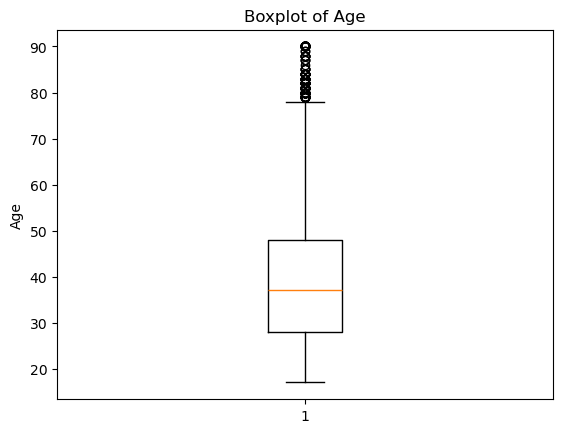

In [40]:
import matplotlib.pyplot as plt

plt.boxplot(df['age'])
plt.title("Boxplot of Age")
plt.ylabel("Age")
plt.show()

In [42]:
print("Minimum age:", df['age'].min())
print("Maximum age:", df['age'].max())

Minimum age: 17
Maximum age: 90


<p style="font-family: Cambria; font-size: 22px;"><b>Method 2 :IQR Method

><p style="font-family: Cambria; font-size: 22px;"><b>Step 1: Calculate IQR

In [44]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -2.0
Upper Bound: 78.0


> <p style="font-family: Cambria; font-size: 22px;"><b>Step 2: See Outliers 
    
>> This will display rows where age is an outlier.Outliers in the 'age' variable were identified using the IQR method and visualized using a boxplot. Observations outside 1.5×IQR were considered potential outliers.

In [46]:
age_outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

age_outliers


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
74,79,Private,124744,Some-college,10,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,0,0,20,United-States,<=50K
222,90,Private,51744,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,2206,40,United-States,<=50K
430,80,Private,107762,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Male,0,0,24,United-States,<=50K
918,81,Self-emp-not-inc,136063,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,30,United-States,<=50K
1040,90,Private,137018,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48524,80,Private,107740,HS-grad,9,Widowed,Handlers-cleaners,Not-in-family,White,Male,0,0,30,United-States,<=50K.
48564,80,Self-emp-not-inc,29441,7th-8th,4,Married-spouse-absent,Farming-fishing,Unmarried,White,Male,0,0,15,United-States,<=50K.
48667,83,Private,192305,Some-college,10,Divorced,Prof-specialty,Unmarried,White,Female,0,0,20,United-States,<=50K.
48709,79,Local-gov,132668,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,15,United-States,<=50K.


> <p style="font-family: Cambria; font-size: 22px;"><b>Step 3: Count Them

In [48]:
print("Number of age outliers:", age_outliers.shape[0])

Number of age outliers: 216


<p style="font-family: Cambria; font-size: 22px;"><b>In Adult Dataset Age usually ranges:

 >> Minimum ≈ 17

 >> Maximum ≈ 90

> These are realistic human ages, so even if statistically flagged, they may not be true errors.

>> Not all statistical outliers are data errors.

>> Although 216 observations were flagged as outliers using the IQR method, these values represent valid human ages and were retained for further analysis.

<p style="font-family: Cambria; font-size: 26px;"><b>IQR Method combining all numerical columns

In [60]:
num_cols = ['age','fnlwgt', 'education-num', 'capital-gain', 
            'capital-loss', 'hours-per-week']

In [62]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"{col}")
    print("Lower Bound:", lower_bound)
    print("Upper Bound:", upper_bound)
    print("Number of Outliers:", outliers.shape[0])
    print("-" * 50)


age
Lower Bound: -2.0
Upper Bound: 78.0
Number of Outliers: 216
--------------------------------------------------
fnlwgt
Lower Bound: -62586.75
Upper Bound: 417779.25
Number of Outliers: 1453
--------------------------------------------------
education-num
Lower Bound: 4.5
Upper Bound: 16.5
Number of Outliers: 1794
--------------------------------------------------
capital-gain
Lower Bound: 0.0
Upper Bound: 0.0
Number of Outliers: 4035
--------------------------------------------------
capital-loss
Lower Bound: 0.0
Upper Bound: 0.0
Number of Outliers: 2282
--------------------------------------------------
hours-per-week
Lower Bound: 32.5
Upper Bound: 52.5
Number of Outliers: 13496
--------------------------------------------------


<p style="font-family: Cambria; font-size: 22px;"><b>Visualize With Boxplot

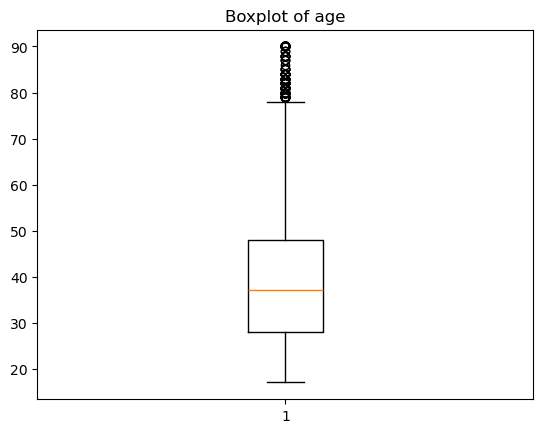

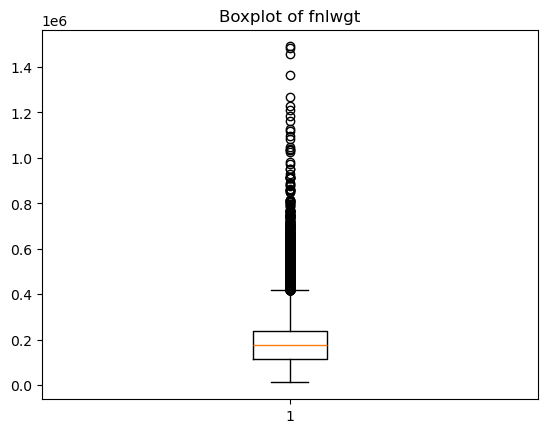

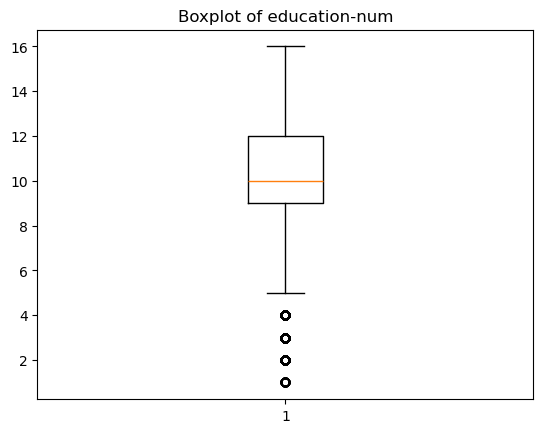

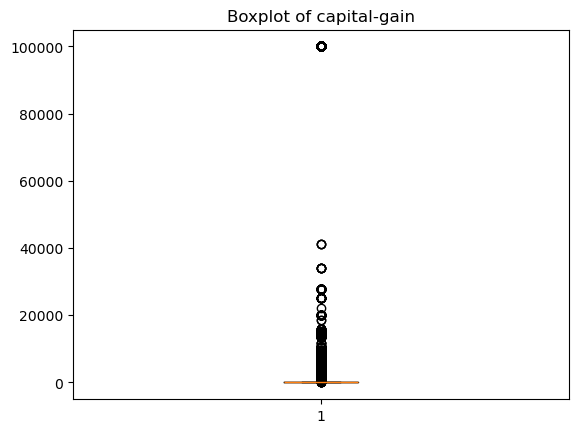

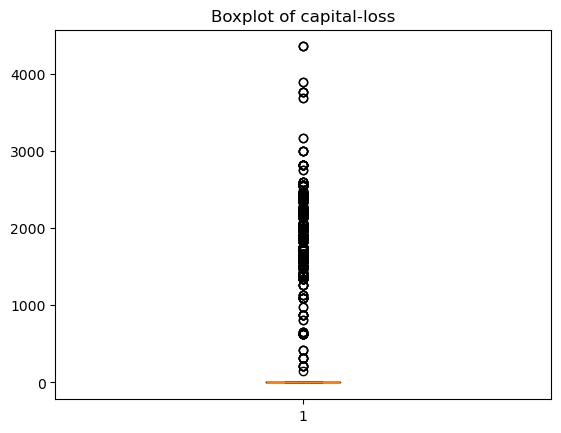

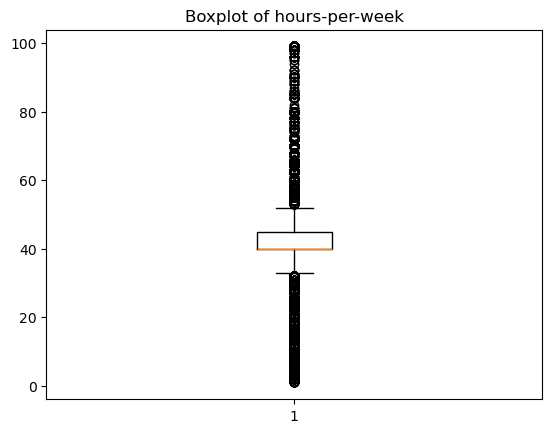

In [64]:
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure()
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


<p style="font-family: Cambria; font-size: 18px;"><b>Outlier detection was performed using the IQR method. Although several extreme values were identified in capital-gain and capital-loss due to skewed distributions, these values were retained as they represent valid economic variations.

<p style="font-family: Cambria; font-size: 22px;"><b>Since capital-gain and capital-loss are highly skewed (mostly 0 with few very large values), we want to see:

>> Maximum values

>> Top extreme values

>> Distribution

>> How many non-zero values exist

<p style="font-family: Cambria; font-size: 22px;"><b> Check Minimum and Maximum

In [66]:
print("Capital Gain Min:", df['capital-gain'].min())
print("Capital Gain Max:", df['capital-gain'].max())

print("Capital Loss Min:", df['capital-loss'].min())
print("Capital Loss Max:", df['capital-loss'].max())


Capital Gain Min: 0
Capital Gain Max: 99999
Capital Loss Min: 0
Capital Loss Max: 4356


<p style="font-family: Cambria; font-size: 22px;"><b>See Top 10 Extreme Values

>> Capital Gain (Largest Values)

>> Capital Loss (Largest Values)

In [68]:
df['capital-gain'].sort_values(ascending=False).head(10)

39908    99999
12655    99999
2319     99999
14238    99999
41840    99999
3105     99999
47185    99999
7629     99999
45645    99999
1826     99999
Name: capital-gain, dtype: int64

In [70]:
df['capital-loss'].sort_values(ascending=False).head(10)

8963     4356
30781    4356
14756    4356
23802    3900
20416    3900
41864    3770
45331    3770
11902    3770
15942    3770
23054    3683
Name: capital-loss, dtype: int64

<p style="font-family: Cambria; font-size: 22px;"><b>See Rows With Extreme Values

In [72]:
df[df['capital-gain'] > 50000]


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1246,54,Self-emp-inc,166459,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
1368,52,Private,152234,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,40,Japan,>50K
1482,53,Self-emp-inc,263925,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,>50K
1528,52,Private,118025,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K
1616,46,Private,370119,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47739,32,Self-emp-inc,225053,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,60,United-States,>50K.
48582,61,Self-emp-not-inc,151369,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,30,United-States,>50K.
48591,36,Private,224566,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,99999,0,45,United-States,>50K.
48598,42,Private,32878,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,42,United-States,>50K.


In [74]:
df[df['capital-gain'] == df['capital-gain'].max()]


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1246,54,Self-emp-inc,166459,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
1368,52,Private,152234,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,40,Japan,>50K
1482,53,Self-emp-inc,263925,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,>50K
1528,52,Private,118025,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K
1616,46,Private,370119,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47739,32,Self-emp-inc,225053,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,60,United-States,>50K.
48582,61,Self-emp-not-inc,151369,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,30,United-States,>50K.
48591,36,Private,224566,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,99999,0,45,United-States,>50K.
48598,42,Private,32878,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,42,United-States,>50K.


<p style="font-family: Cambria; font-size: 22px;"><b>Check How Many Are Non-Zero

In [76]:
print("Non-zero capital gain:", (df['capital-gain'] > 0).sum())
print("Non-zero capital loss:", (df['capital-loss'] > 0).sum())


Non-zero capital gain: 4035
Non-zero capital loss: 2282


<p style="font-family: Cambria; font-size: 22px;"><b>Visualize Distribution (To See Skewness)

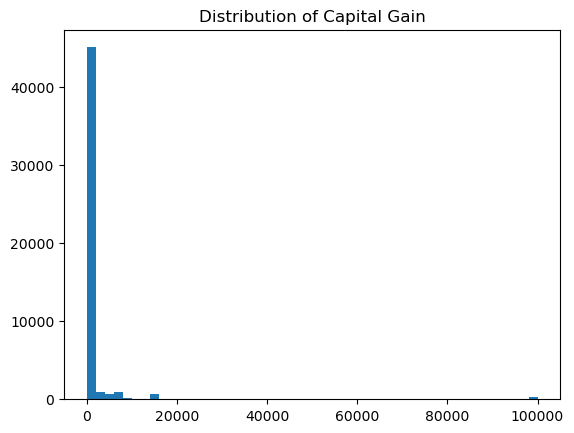

In [78]:
import matplotlib.pyplot as plt

plt.hist(df['capital-gain'], bins=50)
plt.title("Distribution of Capital Gain")
plt.show()


In [168]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K,0
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K,0


In [172]:
# Save cleaned dataset to CSV
df.to_csv('/Users/akhilamaheedhara/Downloads/cleaned_adult.csv', index=False)

print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!


<p style="font-family: Cambria; font-size: 24px;"><b> Conclusion

<p style="font-family: Cambria; font-size: 18px;"><b>
    The dataset was cleaned by handling missing values, standardizing categorical labels, verifying data types, and detecting outliers using both the IQR and Z-Score methods to detect outliers. The counts differ because the methods use different statistical definitions: IQR uses the interquartile range and focuses on the middle 50% of the data, while Z-Score measures how far a value is from the mean in standard deviations. For skewed variables like capital-gain and capital-loss, Z-Score is more sensitive to extreme values, whereas IQR better handles skewness. Both methods confirm that extreme values exist, but these represent valid real-world observations and were retained for modeling.The dataset is now clean, consistent, and suitable for further analysis and modeling”
    